# Regresión lineal del precio de la vivienda en EE. UU.

## Primer de regresión lineal

En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X. El caso de una variable explicativa se denomina regresión lineal simple. Para más de una variable explicativa, el proceso se denomina regresión lineal múltiple.

Los modelos de regresión lineal a menudo se ajustan utilizando el enfoque de mínimos cuadrados, pero también pueden ajustarse de otras formas, como minimizando la "falta de ajuste" en alguna otra norma (como con la regresión de desviaciones mínimas absolutas), o minimizando una penalización. versión de la función de pérdida por mínimos cuadrados como en la regresión de crestas (penalización de $L_2$ -norm) y lazo (penalización de $L_1$ -norm). Por el contrario, el enfoque de mínimos cuadrados se puede utilizar para ajustar modelos que no son modelos lineales. Por lo tanto, aunque los términos "mínimos cuadrados" y "modelo lineal" están estrechamente relacionados, no son sinónimos.

### Importando paquetes y el conjunto de datos

In [ ]:
%pip install numpy pandas seaborn scikit-learn matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/USA_Housing.csv")
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/healthcare_dataset.csv")

df.head()  # vemos los 5 primeros datos del dataframe

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [5]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [6]:
df


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,1,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,0,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,0,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,0,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,0,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,0,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,1,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,0,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,0,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [7]:
#Tambien usaremos One-Hot para las demas categoria que vamos a utilizar.
one_hot_cols = ["Medical Condition", "Insurance Provider",
                "Medication"]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)
#df = df.astype({col: int for col in df.select_dtypes('bool').columns})
df

,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Admission Type,...,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,Tiffany Ramirez,81,1,O-,2022-11-17,Patrick Parker,Wallace-Hamilton,37490.983364,146,Elective,...,False,False,False,True,False,True,False,False,False,False
1,Ruben Burns,35,0,O+,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",47304.064845,404,Emergency,...,False,False,False,False,True,False,False,True,False,False
2,Chad Byrd,61,0,B-,2019-01-09,Paul Baker,Walton LLC,36874.896997,292,Emergency,...,False,False,False,True,False,False,False,True,False,False
3,Antonio Frederick,49,0,B-,2020-05-02,Brian Chandler,Garcia Ltd,23303.322092,480,Urgent,...,False,False,False,True,False,False,False,False,False,True
4,Mrs. Brandy Flowers,51,0,O-,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",18086.344184,477,Urgent,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,0,A+,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",39606.840083,110,Elective,...,False,False,False,False,True,False,True,False,False,False
9996,Stephanie Evans,47,1,AB+,2022-01-06,Christopher Yates,Nash-Krueger,5995.717488,244,Emergency,...,False,True,False,False,False,False,True,False,False,False
9997,Christopher Martinez,54,0,B-,2022-07-01,Robert Nicholson,Larson and Sons,49559.202905,312,Elective,...,False,True,False,False,False,False,True,False,False,False
9998,Amanda Duke,84,0,A+,2020-02-06,Jamie Lewis,Wilson-Lyons,25236.344761,420,Urgent,...,False,False,False,False,True,False,False,False,False,True


In [8]:
df

,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Admission Type,...,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,Tiffany Ramirez,81,1,O-,2022-11-17,Patrick Parker,Wallace-Hamilton,37490.983364,146,Elective,...,False,False,False,True,False,True,False,False,False,False
1,Ruben Burns,35,0,O+,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",47304.064845,404,Emergency,...,False,False,False,False,True,False,False,True,False,False
2,Chad Byrd,61,0,B-,2019-01-09,Paul Baker,Walton LLC,36874.896997,292,Emergency,...,False,False,False,True,False,False,False,True,False,False
3,Antonio Frederick,49,0,B-,2020-05-02,Brian Chandler,Garcia Ltd,23303.322092,480,Urgent,...,False,False,False,True,False,False,False,False,False,True
4,Mrs. Brandy Flowers,51,0,O-,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",18086.344184,477,Urgent,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,0,A+,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",39606.840083,110,Elective,...,False,False,False,False,True,False,True,False,False,False
9996,Stephanie Evans,47,1,AB+,2022-01-06,Christopher Yates,Nash-Krueger,5995.717488,244,Emergency,...,False,True,False,False,False,False,True,False,False,False
9997,Christopher Martinez,54,0,B-,2022-07-01,Robert Nicholson,Larson and Sons,49559.202905,312,Elective,...,False,True,False,False,False,False,True,False,False,False
9998,Amanda Duke,84,0,A+,2020-02-06,Jamie Lewis,Wilson-Lyons,25236.344761,420,Urgent,...,False,False,False,False,True,False,False,False,False,True


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 10000 non-null  object 
 1   Age                                  10000 non-null  int64  
 2   Gender                               10000 non-null  int64  
 3   Blood Type                           10000 non-null  object 
 4   Date of Admission                    10000 non-null  object 
 5   Doctor                               10000 non-null  object 
 6   Hospital                             10000 non-null  object 
 7   Billing Amount                       10000 non-null  float64
 8   Room Number                          10000 non-null  int64  
 9   Admission Type                       10000 non-null  object 
 10  Discharge Date                       10000 non-null  object 
 11  Test Results                 

In [10]:
df.describe()


,Age,Gender,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,51.452200,0.507500,25516.806778,300.082000
std,19.588974,0.499969,14067.292709,115.806027
min,18.000000,0.000000,1000.180837,101.000000
25%,35.000000,0.000000,13506.523967,199.000000
50%,52.000000,1.000000,25258.112566,299.000000
75%,68.000000,1.000000,37733.913727,400.000000
max,85.000000,1.000000,49995.902283,500.000000


**El método 'columns' obtiene los nombres de las columnas (características)**

In [11]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 10000 non-null  object 
 1   Age                                  10000 non-null  int64  
 2   Gender                               10000 non-null  int64  
 3   Blood Type                           10000 non-null  object 
 4   Date of Admission                    10000 non-null  object 
 5   Doctor                               10000 non-null  object 
 6   Hospital                             10000 non-null  object 
 7   Billing Amount                       10000 non-null  float64
 8   Room Number                          10000 non-null  int64  
 9   Admission Type                       10000 non-null  object 
 10  Discharge Date                       10000 non-null  object 
 11  Test Results                 

In [12]:
mapa = {"Normal": 0, "Inconclusive": 1, "Abnormal": 2}
df["Test Results Num"] = df["Test Results"].map(mapa)

# Verificar
print(df[["Test Results", "Test Results Num"]].head())

   Test Results  Test Results Num
0  Inconclusive                 1
1        Normal                 0
2        Normal                 0
3      Abnormal                 2
4        Normal                 0


In [13]:
df


,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Admission Type,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results Num
0,Tiffany Ramirez,81,1,O-,2022-11-17,Patrick Parker,Wallace-Hamilton,37490.983364,146,Elective,...,False,False,True,False,True,False,False,False,False,1
1,Ruben Burns,35,0,O+,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",47304.064845,404,Emergency,...,False,False,False,True,False,False,True,False,False,0
2,Chad Byrd,61,0,B-,2019-01-09,Paul Baker,Walton LLC,36874.896997,292,Emergency,...,False,False,True,False,False,False,True,False,False,0
3,Antonio Frederick,49,0,B-,2020-05-02,Brian Chandler,Garcia Ltd,23303.322092,480,Urgent,...,False,False,True,False,False,False,False,False,True,2
4,Mrs. Brandy Flowers,51,0,O-,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",18086.344184,477,Urgent,...,False,False,False,True,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,0,A+,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",39606.840083,110,Elective,...,False,False,False,True,False,True,False,False,False,2
9996,Stephanie Evans,47,1,AB+,2022-01-06,Christopher Yates,Nash-Krueger,5995.717488,244,Emergency,...,True,False,False,False,False,True,False,False,False,0
9997,Christopher Martinez,54,0,B-,2022-07-01,Robert Nicholson,Larson and Sons,49559.202905,312,Elective,...,True,False,False,False,False,True,False,False,False,0
9998,Amanda Duke,84,0,A+,2020-02-06,Jamie Lewis,Wilson-Lyons,25236.344761,420,Urgent,...,False,False,False,True,False,False,False,False,True,0


In [14]:
no_se_usa = ["Name", "Date of Admission", "Discharge Date", "Doctor", "Hospital", "Room Number","Blood Type", "Billing Amount","Test Results","Admission Type"]
X= df.drop(columns=no_se_usa)
y=df["Test Results Num"]

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

In [ ]:
sns.pairplot(df)

**Distribución del precio (la cantidad prevista)**

In [ ]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

In [ ]:
df['Price'].plot.density()

**Matriz de correlación y heatmap**

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [ ]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión lineal**

In [15]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (10000, 19)
Tamaño de Variable Objetivo: (10000,)


In [16]:
X.head()

,Age,Gender,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results Num
0,81,1,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,1
1,35,0,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,0
2,61,0,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0
3,49,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,2
4,51,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0


In [17]:
y.head()

0    1
1    0
2    0
3    2
4    0
Name: Test Results Num, dtype: int64

### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [18]:
from sklearn.model_selection import train_test_split

**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [20]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (7000, 19)
Tamaño del conjunto de características de prueba: (3000, 19)
Tamaño de la variable objetivo del entrenamiento: (7000,)
Tamaño de la variable objetivo de prueba: (3000,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Ajustamos el modelo al propio objeto instanciado**

In [24]:
lm.fit(X_train,y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [25]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: 1.4521717162097048e-13


In [26]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [-2.80815495e-15 -4.44089210e-16 -4.54414775e-17  4.73158559e-17
 -2.23623151e-16  2.51721933e-19  1.88719717e-16  6.45072708e-17
 -1.43501552e-16  6.36210471e-17  2.29129030e-16 -1.83187228e-17
 -1.19329153e-16 -8.01109916e-17  1.50612403e-16  1.84409878e-17
 -5.08194174e-17 -5.37588189e-17  1.00000000e+00]


In [27]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Age,-2.808155e-15
Gender,-4.440892e-16
Medical Condition_Arthritis,-4.544148e-17
Medical Condition_Asthma,4.731586e-17
Medical Condition_Cancer,-2.236232e-16
Medical Condition_Diabetes,2.517219e-19
Medical Condition_Hypertension,1.887197e-16
Medical Condition_Obesity,6.450727e-17
Insurance Provider_Aetna,-1.435016e-16
Insurance Provider_Blue Cross,6.362105e-17


### Cálculo de errores estándar y estadística t para los coeficientes

In [28]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0] * len(X_train.columns)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Age,-2.808155e-15,3.361703e-17,-8.353370e+01
Gender,-4.440892e-16,1.315734e-15,-3.375219e-01
Medical Condition_Arthritis,-4.544148e-17,1.769844e-15,-2.567542e-02
Medical Condition_Asthma,4.731586e-17,1.756593e-15,2.693615e-02
Medical Condition_Cancer,-2.236232e-16,1.745483e-15,-1.281153e-01
Medical Condition_Diabetes,2.517219e-19,1.776631e-15,1.416850e-04
Medical Condition_Hypertension,1.887197e-16,1.765582e-15,1.068881e-01
Medical Condition_Obesity,6.450727e-17,1.777877e-15,3.628332e-02
Insurance Provider_Aetna,-1.435016e-16,1.627846e-15,-8.815423e-02
Insurance Provider_Blue Cross,6.362105e-17,1.641101e-15,3.876729e-02


In [29]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
Test Results Num > 
Insurance Provider_Cigna > 
Medical Condition_Hypertension > 
Medication_Ibuprofen > 
Insurance Provider_Blue Cross > 
Medical Condition_Obesity > 
Medical Condition_Asthma > 
Medication_Lipitor > 
Medical Condition_Diabetes > 
Insurance Provider_Medicare > 
Medical Condition_Arthritis > 
Medication_Paracetamol > 
Medication_Penicillin > 
Medication_Aspirin > 
Insurance Provider_UnitedHealthcare > 
Insurance Provider_Aetna > 
Medical Condition_Cancer > 
Gender > 
Age


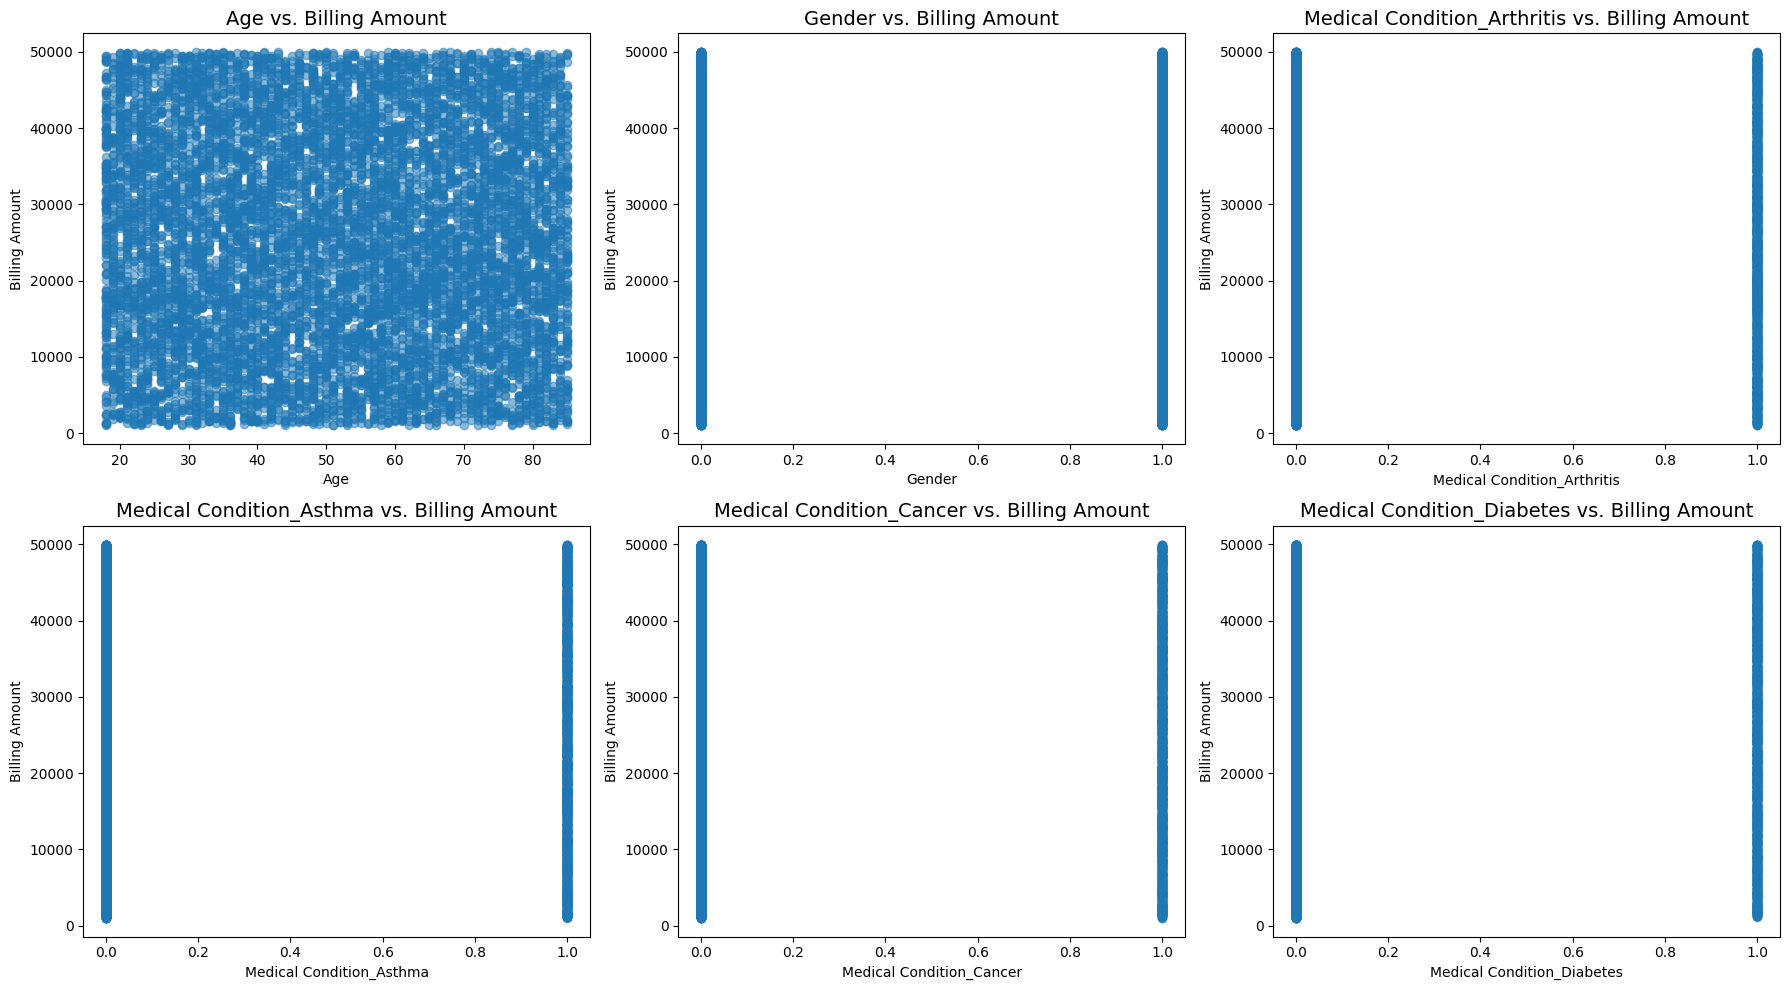

In [30]:
# Lista de columnas (ej: las más importantes del modelo)
l = list(cdf.index)   # asumiendo que cdf tiene tus coeficientes / features ordenadas

# Cuántas variables quieres graficar (ej: 6 primeras)
n = 6
cols_to_plot = l[:n]

# Definir el grid: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # para iterar fácilmente

# Hacer scatter plot para cada columna contra "Billing Amount"
for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df["Billing Amount"], alpha=0.5)
    axes[i].set_title(f"{col} vs. Billing Amount", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Billing Amount")

plt.tight_layout()
plt.show()

**R cuadrado del ajuste del modelo**

In [31]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 1.0


### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [32]:
predictions = lm.predict(X_test)
print ("Tipo del objeto predicho :", type(predictions))
print ("Tamaño del objeto predicho:", predictions.shape)

Tipo del objeto predicho : <class 'numpy.ndarray'>
Tamaño del objeto predicho: (3000,)


**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

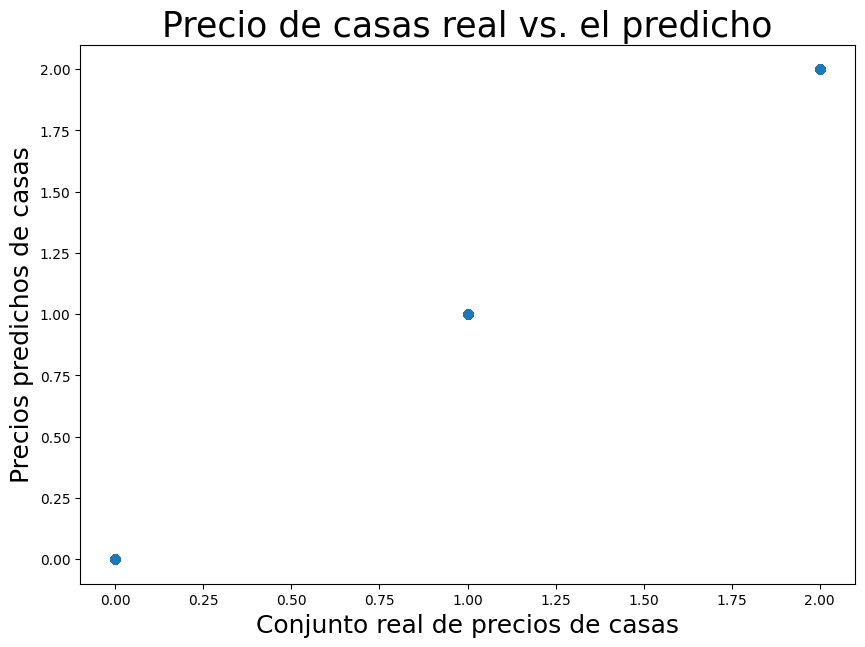

In [33]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

C:\Users\Matias\AppData\Local\Temp\ipykernel_10692\1939217874.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histograma de residuos para verificar la normalidad '}, xlabel='Residuos', ylabel='Densidad del kernel'>

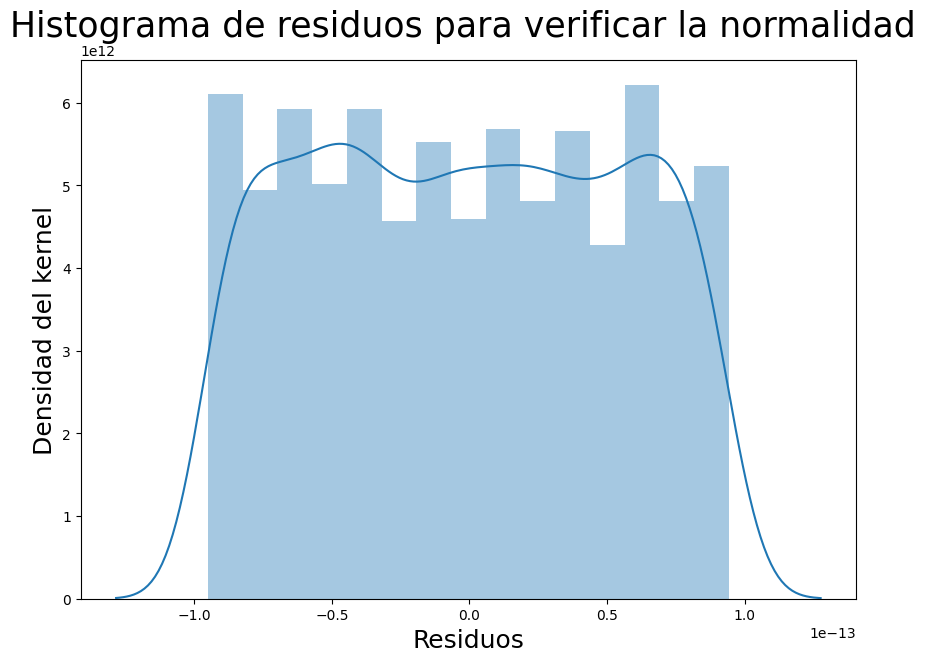

In [34]:
plt.figure(figsize=(10,7))
plt.title("Histograma de residuos para verificar la normalidad ",fontsize=25)
plt.xlabel("Residuos",fontsize=18)
plt.ylabel("Densidad del kernel", fontsize=18)
sns.distplot([y_test-predictions])

**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


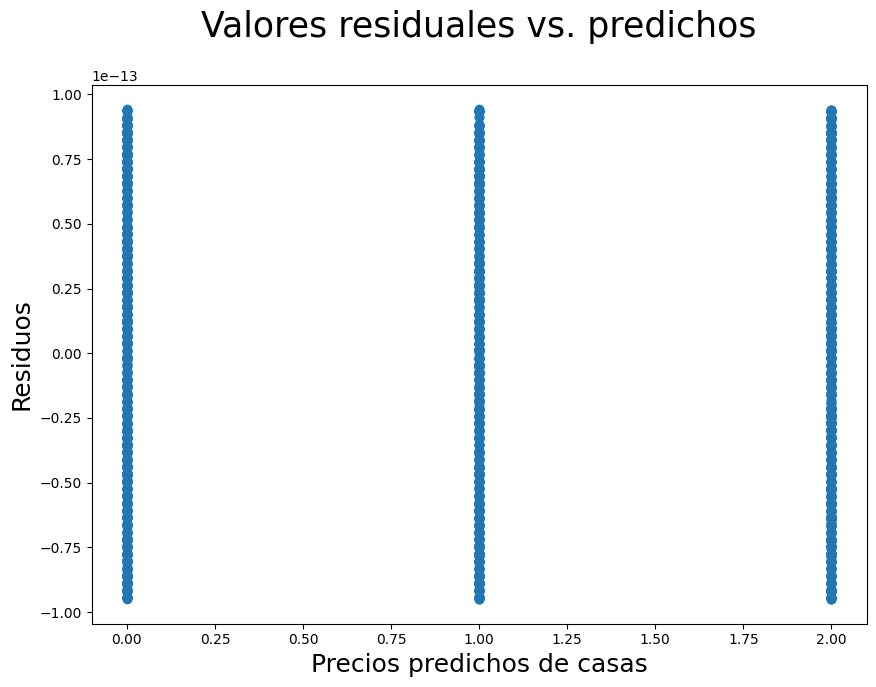

In [35]:
plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos\n",fontsize=25)
plt.xlabel("Precios predichos de casas",fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Métricas de evaluación de la regresión**

In [36]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 4.785265199423205e-14
Mean square error (MSE): 3.0400190277505047e-27
Root mean square error (RMSE): 5.5136367560354435e-14


**Valor R cuadrado**

In [38]:
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Valor R-squared de las predicciones: 1.0
